# Exploratory Data Analysis on Loan Data from Prosper
## by Obimba Smart Chukwunenye

## Introduction
 This project aims to understand the factors that affect loan status. The data set contains `113,937` loans with `81` variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. See this data [dictionary](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0) to understand the dataset's variables.

## Preliminary Wrangling


In [1]:
# import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb
import importlib
import plot_script
importlib.reload(plot_script)
from plot_script import *
import warnings
warnings.filterwarnings('ignore')

#set plots to be embedded inline
%matplotlib inline

In [2]:
#read the data dictionary
dictionary = pd.read_csv('./data/data_dictionary.csv', usecols=[0, 1], index_col=0).iloc[:31, :2]

> Load the dataset 

In [3]:
#load data
loan_data = pd.read_csv('./data/prosperLoanData.csv')

In [4]:
#basic data understanding
loan_data.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [5]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss


 The dataset contains `113937` data points (loans) and `81` variables describing the loan. Majority of the variables are floats, while others are boolean type, objects (strings) and integers

 #### The main features of interest for this analysis include
`
LoanStatus, BorrowerRate, DebtToIncomeRatio, LoanOriginalAmount, StatedMonthlyIncome, MonthlyLoanPayment, 
`

 #### To help support my investigation, the following variables would be explored too:
`
ListingCategory (numeric), BorrowerState, Occupation, EmploymentStatus, IncomeVerifiable, IsBorrowerHomeowner, Term
`
> 

In [6]:
#drop columns not needed
main_columns = [  'ListingKey', 'LoanStatus', 'ClosedDate', 'Term', 
                  'BorrowerRate','ListingCategory', 'ListingCreationDate',
                  'BorrowerState', 'Occupation', 'EmploymentStatus', 'IsBorrowerHomeowner', 
                  'ListingCategory (numeric)', 'StatedMonthlyIncome',
                  'MonthlyLoanPayment', 'LoanOriginalAmount', 'DebtToIncomeRatio']

loan_df = loan_data.drop(columns=[column for  column in loan_data.columns if column not in main_columns])

#set index to Listing Key
loan_df = loan_df.set_index('ListingKey', drop=True)

In [7]:
pd.set_option("display.max_columns", 40)
loan_df.head()

,ListingCreationDate,Term,LoanStatus,ClosedDate,BorrowerRate,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,IsBorrowerHomeowner,DebtToIncomeRatio,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment
ListingKey,,,,,,,,,,,,,,
1021339766868145413AB3B,2007-08-26 19:09:29.263000000,36,Completed,2009-08-14 00:00:00,0.1580,0,CO,Other,Self-employed,True,0.17,3083.333333,9425,330.43
10273602499503308B223C1,2014-02-27 08:28:07.900000000,36,Current,NaN,0.0920,2,CO,Professional,Employed,False,0.18,6125.000000,10000,318.93
0EE9337825851032864889A,2007-01-05 15:00:47.090000000,36,Completed,2009-12-17 00:00:00,0.2750,0,GA,Other,Not available,False,0.06,2083.333333,3001,123.32
0EF5356002482715299901A,2012-10-22 11:02:35.010000000,36,Current,NaN,0.0974,16,GA,Skilled Labor,Employed,True,0.15,2875.000000,10000,321.45
0F023589499656230C5E3E2,2013-09-14 18:38:39.097000000,36,Current,NaN,0.2085,2,MN,Executive,Employed,True,0.26,9583.333333,15000,563.97


In [8]:
loan_df.duplicated().sum()

871

In [9]:
loan_df.dtypes

ListingCreationDate           object
Term                           int64
LoanStatus                    object
ClosedDate                    object
BorrowerRate                 float64
ListingCategory (numeric)      int64
BorrowerState                 object
Occupation                    object
EmploymentStatus              object
IsBorrowerHomeowner             bool
DebtToIncomeRatio            float64
StatedMonthlyIncome          float64
LoanOriginalAmount             int64
MonthlyLoanPayment           float64
dtype: object

In [10]:
loan_df.describe()

,Term,BorrowerRate,ListingCategory (numeric),DebtToIncomeRatio,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment
count,113937.000000,113937.000000,113937.000000,105383.000000,1.139370e+05,113937.00000,113937.000000
mean,40.830248,0.192764,2.774209,0.275947,5.608026e+03,8337.01385,272.475783
std,10.436212,0.074818,3.996797,0.551759,7.478497e+03,6245.80058,192.697812
min,12.000000,0.000000,0.000000,0.000000,0.000000e+00,1000.00000,0.000000
25%,36.000000,0.134000,1.000000,0.140000,3.200333e+03,4000.00000,131.620000
50%,36.000000,0.184000,1.000000,0.220000,4.666667e+03,6500.00000,217.740000
75%,36.000000,0.250000,3.000000,0.320000,6.825000e+03,12000.00000,371.580000
max,60.000000,0.497500,20.000000,10.010000,1.750003e+06,35000.00000,2251.510000


## Data Description

The following table describes each variable associated with each loan

In [11]:
pd.set_option('display.max_colwidth', None)
left_aligned_dictionary = dictionary.style.set_properties(**{'text-align': 'left'})
display(left_aligned_dictionary)

,Description
Variable,
ListingKey,"Unique key for each listing, same value as the 'key' used in the listing object in the API."
ListingNumber,The number that uniquely identifies the listing to the public as displayed on the website.
ListingCreationDate,The date the listing was created.
CreditGrade,The Credit rating that was assigned at the time the listing went live. Applicable for listings pre-2009 period and will only be populated for those listings.
Term,The length of the loan expressed in months.
LoanStatus,"The current status of the loan: Cancelled, Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket."
ClosedDate,nan
BorrowerAPR,The Borrower's Annual Percentage Rate (APR) for the loan.
BorrowerRate,The Borrower's interest rate for this loan.


## Data Quality Issues

1. Remove duplicate elements

2. Rename the `ListingCategories` values from numbers to actual words for easy understanding. Example: `1 - Debt Consolidation, 2 - Home Improvement`

3. The `ListingCreationDate` variable should be a datetime formart instead of object (string)

4. `Term`, `LoanStatus`, `EmploymentStatus`, `IsBorrowerHomeOwner`, `Occupation`, `BorrowerState` `ListingCategory numeric` should be converted to Categorical variables

5. Rename the `ListingCategory numeric` into shorter and appropriate name

6.I need to investigate only valid data for the major columns of interest such as: `EmploymentStatus`, `Occupation`, `BorrowerState`. Any Nan value in these columns would be dropped considering that they aren't much compared with the total data points

7. The `BorrowerRate` column contains 0 which is not normal. I expect that every loan should have an interest rate. For this analysis these data points would be removed

In [12]:
#drop duplicated elements/index
loan_df = loan_df[~loan_df.index.duplicated(keep='first')]

# Rename the ListingCategories values from numbers to actual words for easy understanding
loan_df['ListingCategory (numeric)'] = loan_df['ListingCategory (numeric)'].map({
            0 : 'Not Available', 1 : 'Debt Consolidation', 2 : 'Home Improvement',
            3 : 'Business', 4 : 'Personal Loan', 5 : 'Student Use', 6 : 'Auto',
            7 : 'Other', 8 : 'Baby$Adoption', 9 : 'Boat', 10 : 'Cosmetic Procedure', 11 : 'Engagement Ring',
            12: 'Green Loans', 13 : 'Household Expenses', 14 :  'Large Purchases', 15 : 'Medical/Dental',
            16: 'Mototcycle', 17 : 'RV', 18 : 'Taxes', 19 : 'Vaacation', 20 : 'Wedding Loans'
})

#1. convert columns into appropriate data type
loan_df['ListingCreationDate'] = pd.to_datetime(loan_df['ListingCreationDate'])

#4.drop rows for which EmployeeStatus or Occupation or BorrowerState is NaN
cat_nan_columns = ['EmploymentStatus', 'Occupation', 'BorrowerState']
condition = loan_df.EmploymentStatus.isnull() | loan_df.Occupation.isnull() | loan_df.BorrowerState.isnull()
loan_df = loan_df.drop(index = loan_df[condition].index)

#2. convert columns into ordered/unordered categorical dtype
categorical_vars = {'Term' : 'ordered', 'LoanStatus' : 'unordered', 'EmploymentStatus' : 'ordered', 
                    'IsBorrowerHomeowner' : 'ordered', 'Occupation' : 'ordered', 
                    'BorrowerState' : 'ordered', 'ListingCategory (numeric)' : 'ordered'}
for col in categorical_vars:
    categories = loan_df[col].unique()
    try:
        customDtype = pd.api.types.CategoricalDtype(categories=categories, ordered=True)
    except ValueError as e:
        # categories = 
        print(col, e)
        
    loan_df[col] = loan_df[col].astype(customDtype)

#test
print(all(loan_df[categorical_vars].dtypes == 'category'))

True


In [13]:
#. Rename the ListingCategory numeric into shorter and appropriate name
loan_df.rename(columns= {'ListingCategory (numeric)' : 'ListingCategory'}, inplace=True)

In [14]:
#drop rows with 0 BorrowerRate
loan_df = loan_df[loan_df.BorrowerRate != 0]

In [15]:
loan_df.sample(5)

,ListingCreationDate,Term,LoanStatus,ClosedDate,BorrowerRate,ListingCategory,BorrowerState,Occupation,EmploymentStatus,IsBorrowerHomeowner,DebtToIncomeRatio,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment
ListingKey,,,,,,,,,,,,,,
C6283543860752777369F69,2012-03-28 10:13:58.963,36,Past Due (31-60 days),NaN,0.3177,Debt Consolidation,SD,Professional,Employed,True,NaN,7083.333333,4000,173.71
13293597325053504E587C5,2013-12-05 15:43:54.123,36,Current,NaN,0.0605,Debt Consolidation,CA,Administrative Assistant,Employed,False,0.19,5000.000000,5000,152.22
A72735850298510199C1FFF,2013-07-19 08:19:58.080,60,Current,NaN,0.2432,Debt Consolidation,MO,Executive,Employed,True,0.23,7000.000000,15000,434.31
D5163568777271668A14773,2013-01-22 16:41:40.590,60,Past Due (1-15 days),NaN,0.2359,Debt Consolidation,OH,Professional,Employed,False,0.35,5166.666667,15000,427.96
10753581982114927637F03,2013-06-21 11:01:22.600,60,Current,NaN,0.1914,Debt Consolidation,MA,Other,Employed,False,0.30,4375.000000,15000,390.26


In [16]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105402 entries, 1021339766868145413AB3B to E6ED3600409833199F711B7
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   ListingCreationDate  105402 non-null  datetime64[ns]
 1   Term                 105402 non-null  category      
 2   LoanStatus           105402 non-null  category      
 3   ClosedDate           48673 non-null   object        
 4   BorrowerRate         105402 non-null  float64       
 5   ListingCategory      105402 non-null  category      
 6   BorrowerState        105402 non-null  category      
 7   Occupation           105402 non-null  category      
 8   EmploymentStatus     105402 non-null  category      
 9   IsBorrowerHomeowner  105402 non-null  category      
 10  DebtToIncomeRatio    97015 non-null   float64       
 11  StatedMonthlyIncome  105402 non-null  float64       
 12  LoanOriginalAmount   105402 non-null  

## Univariate Exploration

In this section, I would investigate the major variables in the data to understand, their distributions to help answer some question

What is the current status of majority of the loans as at the time the data was collected?

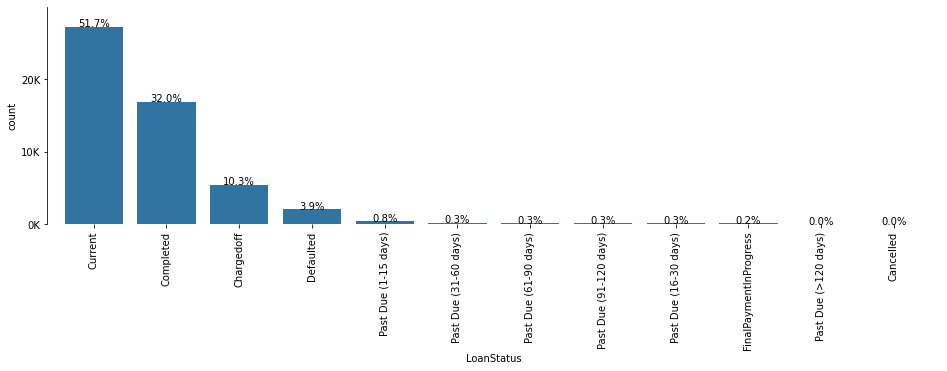

In [17]:
create_relative_frequency(loan_df, 'LoanStatus', 21)

- On Loan status, we can see that 52% of Loans collected were still Current as at the time this data was collected. This is followed by 31% completion. Loans that were charged off together with those defaulted amounted to about 14%

## Note
For the purpose and credibility of this analysis, I will analyse only loans for which thier status are not Current. This include loans that have been completed, Defaulted, Charged off or Due. Also for a more cleaner approach, I would convert all `Past due...` loans into one category, `Past due` and remove the other two categories `FinalPaymentInProgress` and `Cancelled`. since they contain very little amount compared with the total data

In [18]:
#select only loans that are not current
loan_df = loan_df[loan_df['LoanStatus'] != 'Current']

#test
any(loan_df.LoanStatus == 'Current')

False

In [19]:
#change all past due data into one single category

def map_past_dues(value):
    ''' This function take a strings as argument, checks if it
        contains a substring, then returns a new value if true, else
        it returns the original value
    '''
    if 'Past' in value:
        return 'Past Due'
    return value

#aplly function to the series
loan_df['LoanStatus'] = loan_df.LoanStatus.map(map_past_dues)

#remove Cancelled, and FinalPaymentInProgress from the data
loan_df = loan_df[loan_df.LoanStatus.isin(['Completed', 'Defaulted', 'Chargedoff', 'Past Due'])]

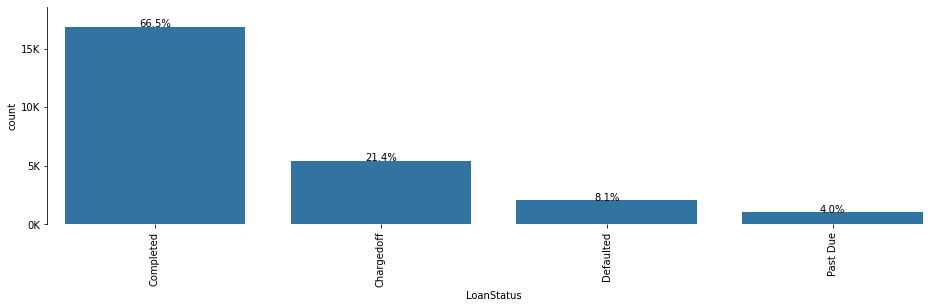

In [20]:
create_relative_frequency(loan_df, 'LoanStatus', 21)

- Which Job/Occupation dominated the loan data ? This will help in determining the majority of occupation type involved in loan during this period.

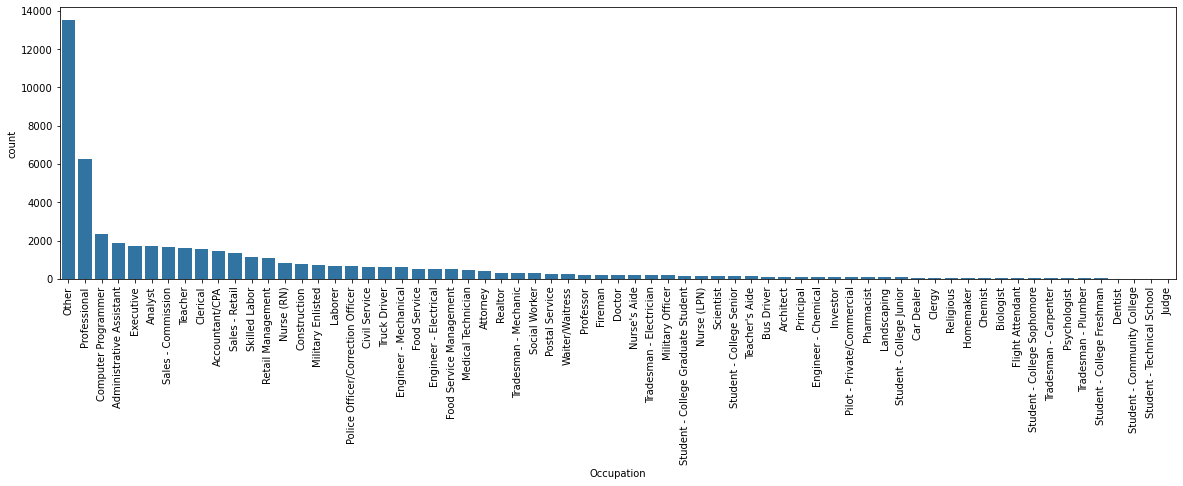

In [21]:
plt.figure(figsize=[20, 5])

#get the order in descending order
order = loan_df.Occupation.value_counts().index
sb.countplot(data=loan_df, x = 'Occupation', color=sb.color_palette()[0], order=order)
plt.xticks(rotation=90);

Let's explore the top-10 occupations involved in loan

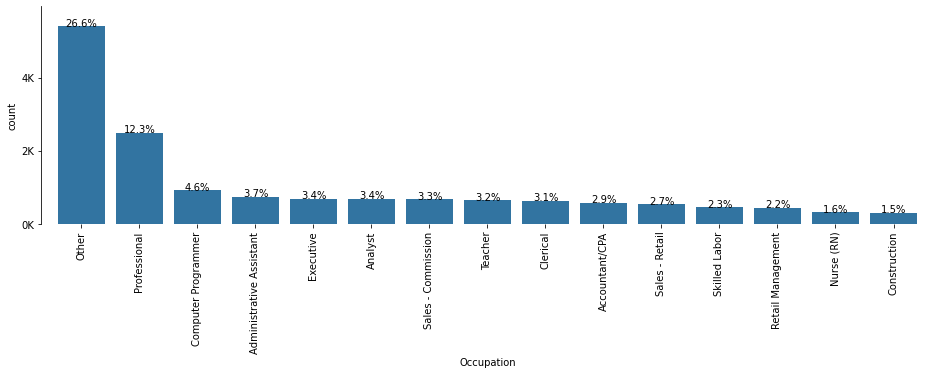

In [22]:
create_relative_frequency(loan_df, 'Occupation', n_subset=15)

From the chart above, we can see an overwhelming long list of different Occupation type mostly dominated by `Other` which doesn't specify any particular occupation. Following Occupation include `Proffesional`, '`Computer Programmer`. `Executive`, `Teacher`, ..... Down the list, we can see the occupation been dominated by `Students` in different academic background and academic levels

- Going futher, let's explore the other major categorical variabls which include `EmploymentStatus`, `ListingCategory`

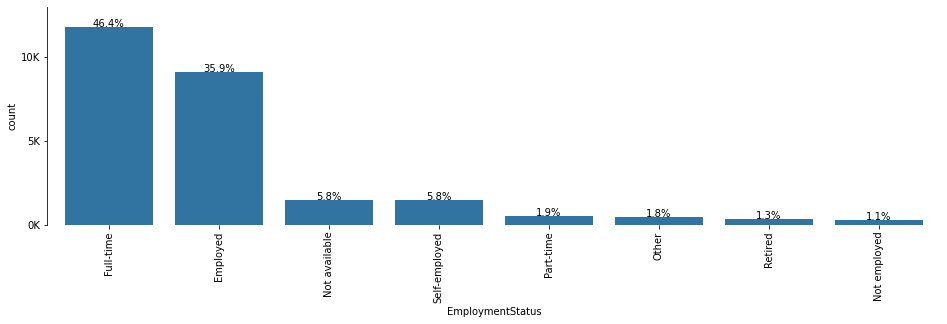

In [23]:
create_relative_frequency(loan_df, 'EmploymentStatus')

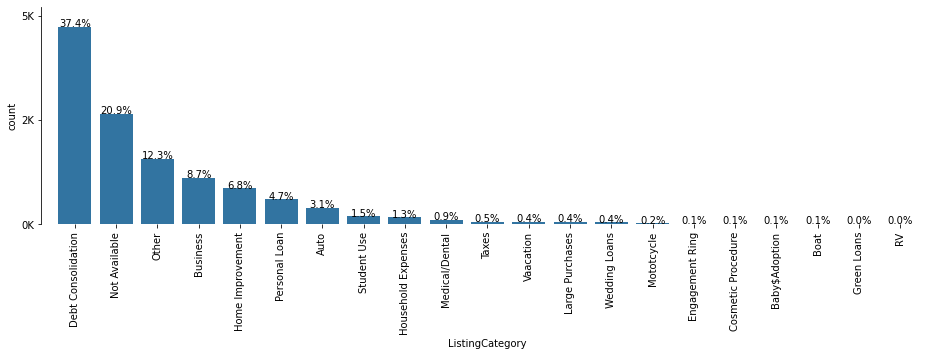

In [24]:
create_relative_frequency(loan_df, 'ListingCategory', 21)

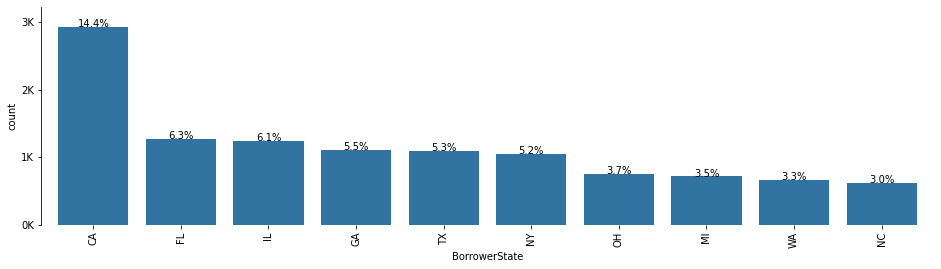

In [25]:
create_relative_frequency(loan_df, 'BorrowerState', n_subset=10)

- From the charts above, on Employment Status, Majority of loanees  were employed, and Fulltime workers. these constitute of about 63%, and 23% respectfully. A smaller category are the self employed which took 5% of the data

- On Listing Category, most of the loans were borrowed for Debt Consolidation. The next two are not well explained as per the data. However, 8.7% and 6.8%  were based on Business and Home Improvement issues

Going further I would explore the numerical variables in the dataset to undertand the distributions

- `StatedMonthlyIncome` which is one of the key factors when determining wether a candidate would qualify for a loan,  is the monthly income the borrower stated at the time the listing was created. I would love to know the distribution of Monthly income of the loanees.

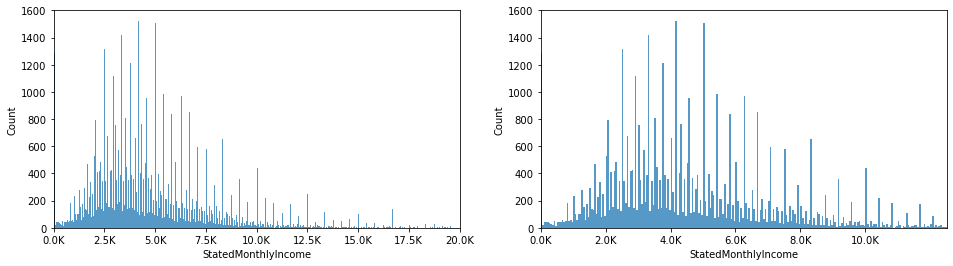

In [26]:
#get the bin
bins = np.arange(0, loan_df.StatedMonthlyIncome.max()+ 50, 50)

#plot the data
plt.subplot(1, 2, 1)
sb.histplot(data=loan_df, x='StatedMonthlyIncome', bins = bins);
plt.xlim(0, 20000);
#format the xtick labels
xticklabels = [0, 2500, 5000, 7500, 10000, 12500, 15000, 17500, 20000]
xlabels = ['{:,.1f}'.format(x/1000) + 'K' for x in xticklabels]
plt.xticks(xticklabels, xlabels);

#plot the data
plt.subplot(1, 2, 2)
sb.histplot(data=loan_df, x='StatedMonthlyIncome', bins = bins);
plt.xlim(0, 12500);
#format the xtick labels
xticklabels = [0, 2000, 4000, 6000, 8000, 10000]
xlabels = ['{:,.1f}'.format(x/1000) + 'K' for x in xticklabels]
plt.xticks(xticklabels, xlabels);

The distribution seems to be right skewed. More data points lie between a monthly inocome of 2.5k and 7.5k. The tail extends up to 20k, most of which are outliers

- Next is the `BorrowerRate`, what is the distribution of the rates for loans collected during this period ?

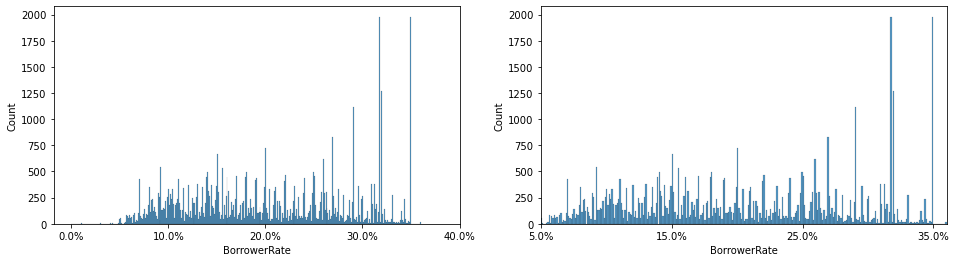

In [27]:
#set the bins
bins = np.arange(0, loan_df.BorrowerRate.max() + 0.001, 0.001)

#plot 1
plt.subplot(1, 2, 1)
sb.histplot(data=loan_df, x='BorrowerRate', bins=bins)
ticks = np.arange(0, 0.36 + 0.05, 0.1)
xlabels = ['{:,.1f}'.format(x*100) + '%' for x in ticks]
plt.xticks(ticks, xlabels);

#plot 2
plt.subplot(1, 2, 2)
sb.histplot(data=loan_df, x='BorrowerRate', bins=bins)
plt.xlim(0.05, 0.36)
ticks = np.arange(0.05, 0.36 + 0.05, 0.1)
xlabels = ['{:,.1f}'.format(x*100) + '%' for x in ticks]
plt.xticks(ticks, xlabels);

From the chart above we start seeing an appreciable amount of loan from 5% interest rate up to about 35%. There's no reasonalble distribution. However we can see that some bars are very much taller than others along the distribution. This may be as a result of most common interest rate offered by Prosper

- Debt-to-income (DTI) ratio is the percentage of your gross monthly income that is used to pay your monthly debt and determines your borrowing risk. What is the distribution of this variable. I would expect a very low debt to income ratio

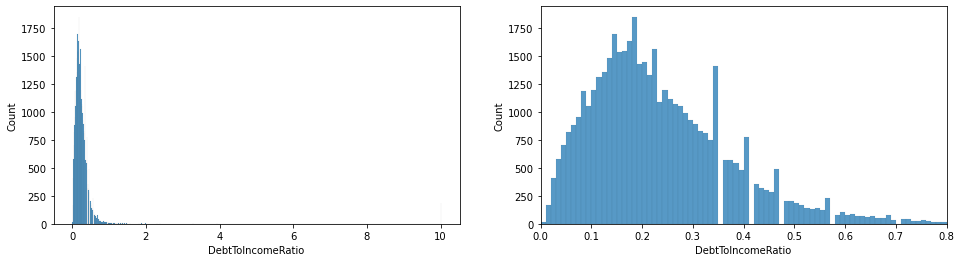

In [28]:
#set the bins
bins = np.arange(0, loan_df.DebtToIncomeRatio.max() + 0.01, 0.01)

#plot 1
plt.subplot(1, 2, 1)
sb.histplot(data=loan_df, x='DebtToIncomeRatio', bins=bins)
# ticks = np.arange(0, 0.36 + 0.05, 0.1)
# xlabels = ['{:,.1f}'.format(x*100) + '%' for x in ticks]
# plt.xticks(ticks, xlabels);

#plot 2
plt.subplot(1, 2, 2)
sb.histplot(data=loan_df, x='DebtToIncomeRatio', bins=bins)
plt.xlim(0, .8);
# ticks = np.arange(0.05, 0.36 + 0.05, 0.1)
# xlabels = ['{:,.1f}'.format(x*100) + '%' for x in ticks]
# plt.xticks(ticks, xlabels);

The first chart shows debt-to-income-ratio with very high outliers of 1001%. Limiting the chart to a range of 80% shows a right skewed distribution. Majority of the loans fall between a debt-to-income-ratio of 5% to 40%. The tail extended to more than 80%.

- `LoanOriginationAmount` is the amount borrowed. What would the distribution be like ?

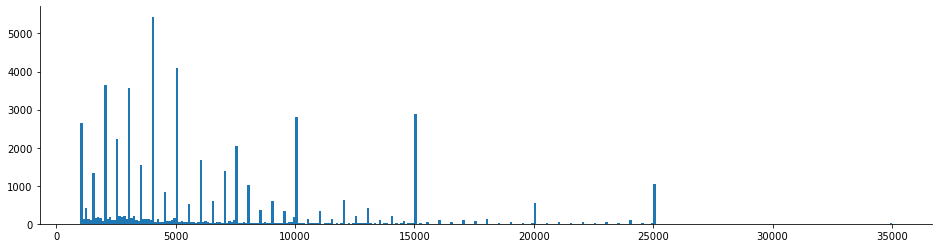

In [29]:
bins = np.arange(1000, loan_df.LoanOriginalAmount.max() + 100, 100 )
plt.hist(data=loan_df, x='LoanOriginalAmount', bins=bins);
sb.despine(bottom = False, left = False)

The information above is clear. Majority of the loan amount borrowd ranges from 1k  -  10k. The tail extended from 15k to 35k. We can also see that very high count on some whole number amount such as 25k, 15k, 10k, 5k, 4k and so on

- Which period recorded the most Listed Loans ? 

- Are there specific time of the year when there is a massive loan application ? To answer this question, I investigate the `ListingCreationDate` and `OriginationDate` which represents the date a loan was listed (like application date) and the date the loanee recieved the money, respectively.

In [30]:
loan_df['ListingYear'] = (loan_df.ListingCreationDate.dt.year).astype('category')
loan_df['ListingMonth'] = (loan_df.ListingCreationDate.dt.month).astype('category')

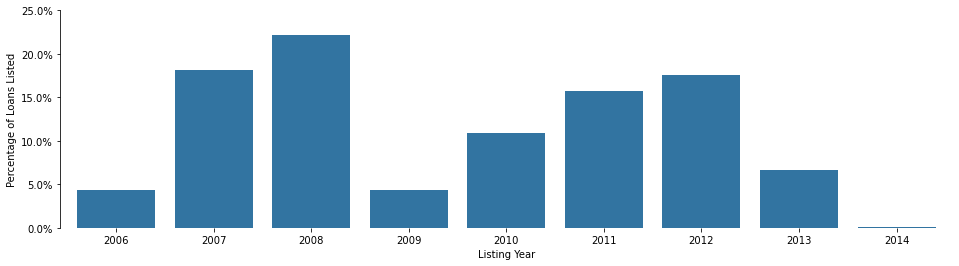

In [31]:
plot_value_count(loan_df, 'ListingYear')
plt.xlabel('Listing Year')
plt.ylabel('Percentage of Loans Listed');

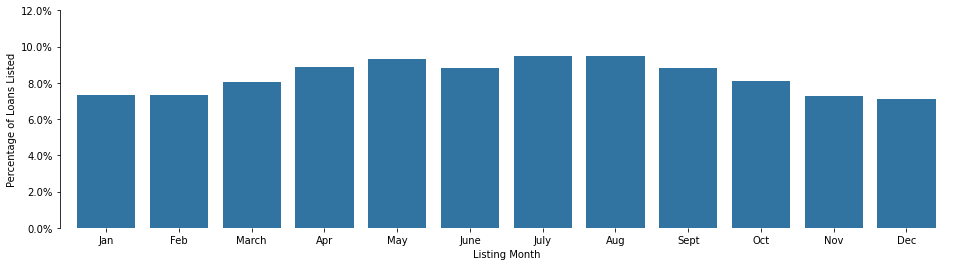

In [32]:
g = plot_value_count(loan_df, 'ListingMonth')
plt.xlabel('Listing Month')
plt.ylabel('Percentage of Loans Listed')
xticks = ['Jan', 'Feb', 'March', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
plt.xticks(g.get_xticks(), xticks);

From the chart above, we see a gradual increase of Listed loans from 2006 - 2008. There was a sharp decrease in 2009, and a futher increase up to 2012. 2008 recorded the highest number of listed loans of more than 20% of the data, followed by 2007. Futhermore, Note that this analysis only focuses on loans that are not current, so we dropped loans with current status. This must have been the reason why 2014 recorded the lowest due to most current been listed that particular year

Interestingly, we can see a normally distributed curve on the Listing Month. The data shows that majority of the loans were from 2006 - 2014 were mostly listed between March and October. While November to February recorded lesser. To make this information clearer. I would split the Months into Quaters: Q1, Q2, Q3, and Q4. This would help make clearer the information.

In [33]:
#split the ListingMonth Data into Quaters using pd.cut pandas function
loan_df['Quater'] = pd.cut(loan_df.ListingMonth, [0, 3, 6, 9, 12], labels=['Q1', 'Q2', 'Q3', 'Q4'])

Text(0, 0.5, 'Proportion')

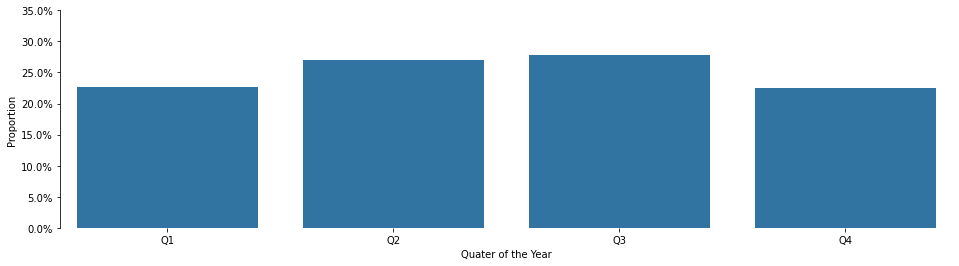

In [34]:
plot_value_count(loan_df, 'Quater')
plt.xlabel('Quater of the Year')
plt.ylabel('Proportion')

The chart above further validates our previous findings. The second and third quater of the year records the more loan listings than the first and fourth, which is the ending and start of a year

## Bivariate Exploration

In this section, I would be investigating relationships between pairs of variables.

- In the previous section (univariate exploration), I explored the distribution of some of the numerical variables. However, knowing how the distribution for each categorical variable (instead of the whole dataset) would be worthwile

- What is the distribution `LoanOriginalAmount` for each 'LoanStatus' ? 

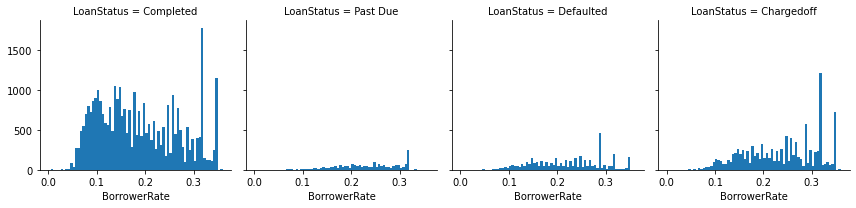

In [35]:
bins = np.arange(0.0001, loan_df.BorrowerRate.max() + 0.005, 0.005)
g = sb.FacetGrid(data=loan_df, col='LoanStatus')
g.map(plt.hist, 'BorrowerRate', bins = bins);

From the chart above we see slightly different distribution between the `Completed` Loans and other categories. The Rate for Loans completed tends to have a rightly skewed distribution: where there's an descrease of counts as the rate increases. This is not the same for the other categories. For example, loans that were charged off tends to have a left skewed distribution, where there seem to be an increase in counts as the rate increases

A boxplot plot may be more suitable in this case:

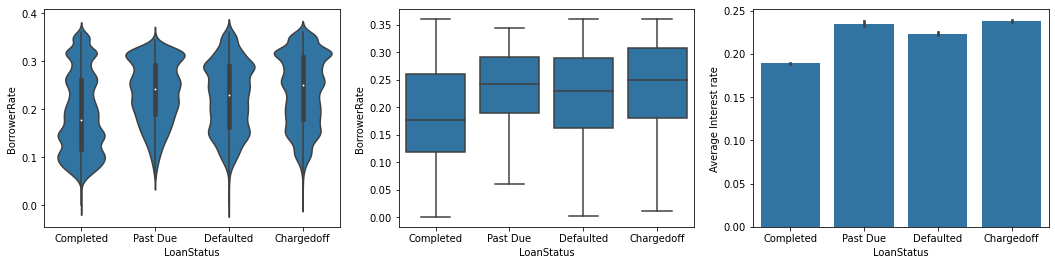

In [36]:
plt.figure(figsize=[18, 4])
color = color=sb.color_palette()[0]

plt.subplot(1,3,1)
sb.violinplot(data=loan_df, x='LoanStatus', y='BorrowerRate', color=color)

plt.subplot(1,3,2)
sb.boxplot(data=loan_df, x='LoanStatus', y='BorrowerRate', color=color)

plt.subplot(1,3,3)
sb.barplot(data=loan_df, x='LoanStatus', y='BorrowerRate', color=color);
plt.ylabel('Average Interest rate');

Interestingly, the charts above futher validates the information. Completed loans have very much lower `Interest rate` than the other categories with a median interest rate lower than 20%. We can see the shape of the violin plot decreasing as the `interest rate` increases. This shows that the majority of the loans completed had much lower interest rate

On the other hand we see a different distribution for the other `Loan Status` with interest rates more than 20% and even more than 30% for charged-off loans. Loans that have been due show an increasing `loan rate` as the shape of the violin plot gets broader. We can also see the violin plot for `Past due` loans reaching it's maximum width at more than 30% `rate`. The same information holds for loans that are defaulted and charged off

But we know that sometimes, the `Interest rate` or `BorrwerRate`  changes based on `Term` length (The amount of time the lender gives you to repay your loan). Is the above information a consquent of Term. Is it possible that loans completed where borrowed on a shorter Term ?

We see from above chart that most of the loans were borrowd on a term lenght of 36 (36 months). And this holds for all the Loan Status. So we can say that majority of all the loans across all `Loan Status` category were borrowed on a tem of 36, hence, the initial information about `Interest rate` seems to be valid

- How does the Debt-to-Income ratio distributes across the other categorical variabels of `Loan Status` ? I would Loans that were completed to have a very low debt-to-income-ratio when compared with other Loan status categories.

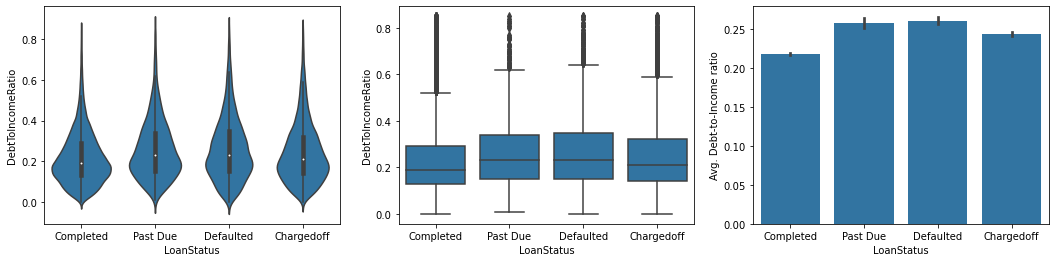

In [37]:
plt.figure(figsize=[18, 4])
color = color=sb.color_palette()[0]

sub_data = loan_df[loan_df.DebtToIncomeRatio <=.85]
plt.subplot(1,3,1)
sb.violinplot(data=sub_data, x='LoanStatus', y='DebtToIncomeRatio', color=color)

plt.subplot(1,3,2)
sb.boxplot(data=sub_data, x='LoanStatus', y='DebtToIncomeRatio', color=color)

plt.subplot(1,3,3)
sb.barplot(data=sub_data, x='LoanStatus', y='DebtToIncomeRatio', color=color);
plt.ylabel('Avg. Debt-to-Income ratio');

We see almost similar distribution from ealier chart. Completed loans have a mean DTI ratio slightly about 20% with lower bound and upper bound of 0 - 50% DTI. We can also see outliers stretching from 50% up to 80%. This is slightly different from the other three categories: which have a median DTI ratio more than 20%.

- What is the relationship between the StatedMonthlyIncome and Debt-to-income ratio ? 

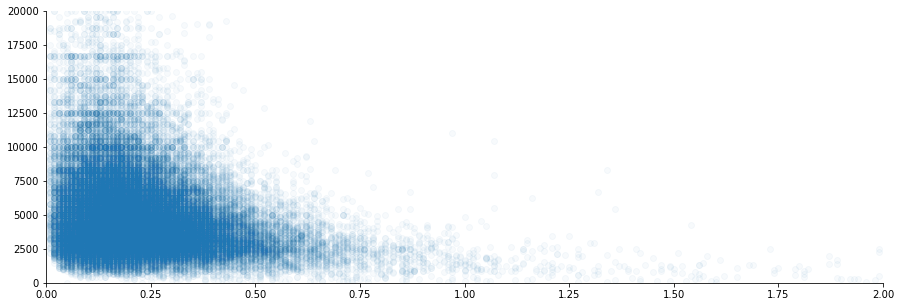

In [38]:
plt.figure(figsize=[15, 5])
from math import sqrt
plt.scatter(y=loan_df.StatedMonthlyIncome, x=loan_df.DebtToIncomeRatio, alpha=1/30)
plt.ylim(0, 20000)
plt.xlim(0, 2)
sb.despine(bottom = False, left = False)

From the chart above we see majority of the data lie between a DTI of 0 and 50%. Thier are outliers extending from 100% DTI to 200%. One thing about this outliers is that they have lower StatedMonthlyIncome below 5k. This shows that those whose Debt-To-Income ratio are very high recieved lower Monthly Income compared to those whoose DTI ratio are low.

## Multivariate Exploration

In this section I would create plots of three or more variables to investigate the data even
further.

- `IsBorrowerHomeOwner` tells if a loanee owns a house or not. Is there any effect of this variable on Loan Status. Do loanees who own a house tend to pay more or ..... ?

To answer this question, I would start by first, investigating the ralationship between `MonthlyIncome`, `Debt-to-Income-ratio` and `IsBorrowerHomeOwner`

(0.0, 60000.0)

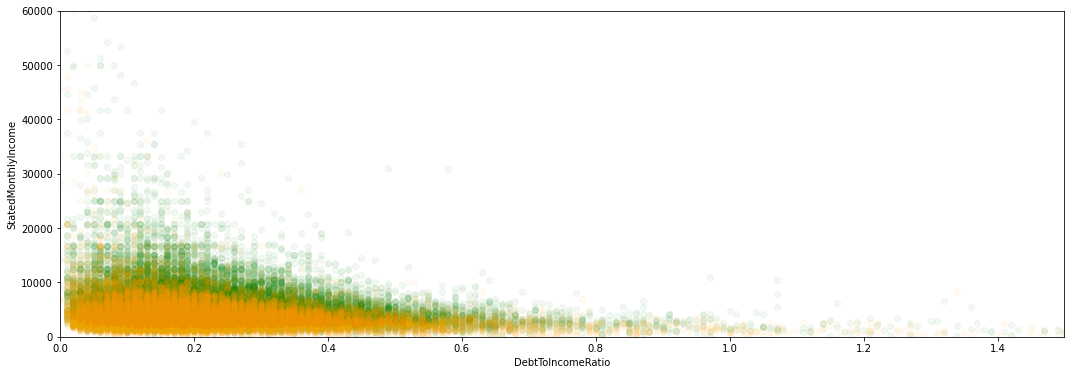

In [39]:
plt.figure(figsize=[18, 6])

status_color_type = [[True, 'green'],
             [False, 'orange']]

for status, color in status_color_type:
    sub_data = loan_df[loan_df.IsBorrowerHomeowner == status]
    sb.regplot(data=sub_data, color=color, x='DebtToIncomeRatio', y='StatedMonthlyIncome',
              fit_reg=False, scatter_kws= {'alpha' : 1/20})
plt.xlim(0, 1.5)
plt.ylim(0, 60000)

From the scatter plot above, we see that majority of the loanees who earn more than 15,000/m are mostly home owners while majority of those who do not own a house tend to earn below 12,000/m. This is normal. To better see this clearer, a pointplot may be more suitable


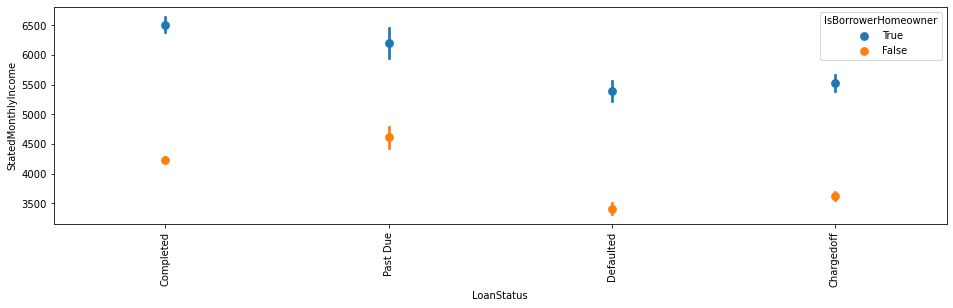

In [40]:
ax1 = sb.pointplot(data=loan_df,  y = 'StatedMonthlyIncome', x='LoanStatus', hue='IsBorrowerHomeowner', linestyles='')
plt.xticks(rotation=90);

From the chart above we see that, home owners tend to recieve more income monthly than those who do not. but how does this affect Loan status ?

To answer that question, I would investigate the relationship between `StatedMonthlyIncome` and `MonthlyLoanPayment` and `DebtToIncomeRatio` across all the Loan.

The formula belows shows the relationship between these three categories

$$
DebtToIncomeRatio = \frac{MonthlyLoanPayment}{StatedMonthlyIncome}
$$

From the above formula, we know that to get a very low `DebtToIncomeRatio`, one needs a high `StatedMonthlyIncome` when compared with the `MonthlyLoanPayment`. That means High Monthly Income and very low Monthly payment would result to a minimal, optimal and best DTI ratio

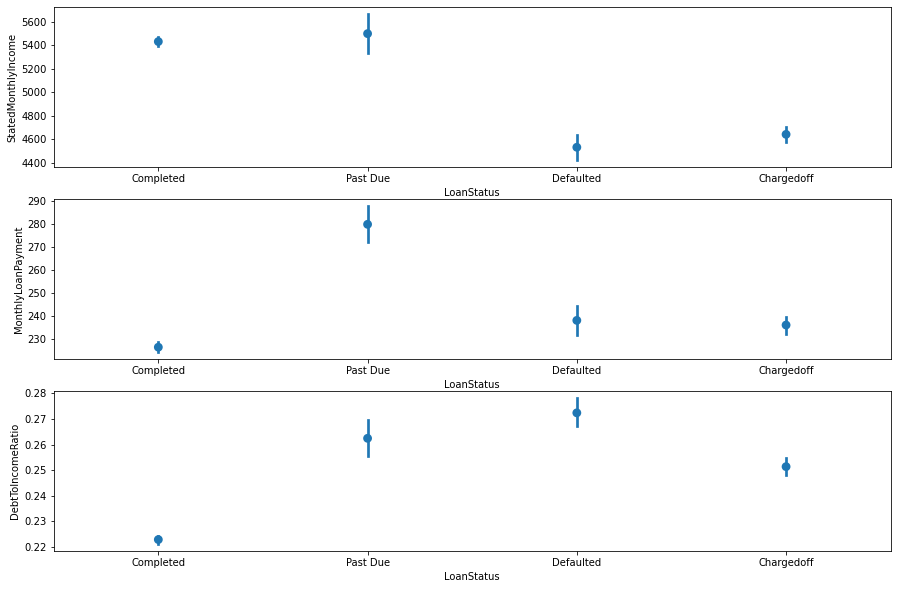

In [41]:
sub_data = loan_df[loan_df.DebtToIncomeRatio <= 1.4]
sub_data = sub_data[sub_data.StatedMonthlyIncome <= 60000]

plt.figure(figsize=[15, 10])
plt.subplot(3, 1, 1)
ax1 = sb.pointplot(data=sub_data,  y = 'StatedMonthlyIncome', x='LoanStatus', linestyles='')

plt.subplot(3, 1, 2, sharex=ax1)
sb.pointplot(data=sub_data,  y = 'MonthlyLoanPayment', x='LoanStatus', linestyles='')
plt.subplot(3, 1, 3, sharex=ax1)
sb.pointplot(data=sub_data,  y = 'DebtToIncomeRatio', x='LoanStatus', linestyles='');

This shows that owning a house gives a little clue about someone's monthly income. People who own houses seems to earn more monthly income than those who do not. And because high monthly-income and low monthly-payment reduces the Debt-To-Income ratio of a loanee, and lower DTI shows lower risk and tendency of completing the loan, Owning a house plays a factor too, though not huge but it gives a little clue of someones ability to pay back loan.

In [42]:
#store the data
loan_df.to_csv('./data/clean_loan_df.csv', index=False)

## Conclusions
- On bivariate exploration, I found out that completed loans have very much lower `Interest rate` less than 20%. While the other categories with interest rate more than 20%

- Similar to the first finding, completed loans also showed very low DebtToIncomeRatio while the other categories were much higher

- Owning a home tells a little of of someone's financial status/monthly income. My analysis revealed that loanees who recieved more than 15k/month were mostly home owners

- Monthly Income has an effect on DebtToIncomeRatio: a higher monthly income will definitely reduce the DTI ratio than a lower one

- What I discovered was that, loanees who completed thier loans recieved more monthly income, borrowed lesser amount, and consequently had lesser DTI ratio. This made it easy for them to complete there loan debts. On the other hand, Incomplete loans (Defaulted, Chargedoff, Past due) was as a result of either low monthly income,  high loan amount, which consequently resulted to a very high Debt-to-income ratio

## In Summay
The major factor that affects the loan status is the Monthly-income, Borrower-Amount, and Debt-to-income ratio. This three variables tells alot about the risk of a loanee